In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycharge as pc
import matplotlib

In [51]:
c = 3e8
lim = 5.0
grid_size = 1000
x0=np.linspace(-lim, lim, grid_size)
x, y, z = np.meshgrid(x0, 0, x0, indexing='ij')
v=0.9*c
tmax=6e-8
print(tmax)
n_frame=50
dt=tmax/n_frame

acceleration = 5e15

charge = pc.LinearAcceleratingCharge(acceleration=acceleration)

simulation = pc.Simulation(charge)


6e-08


In [3]:
import sys
import os
plotdir='./plot'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)

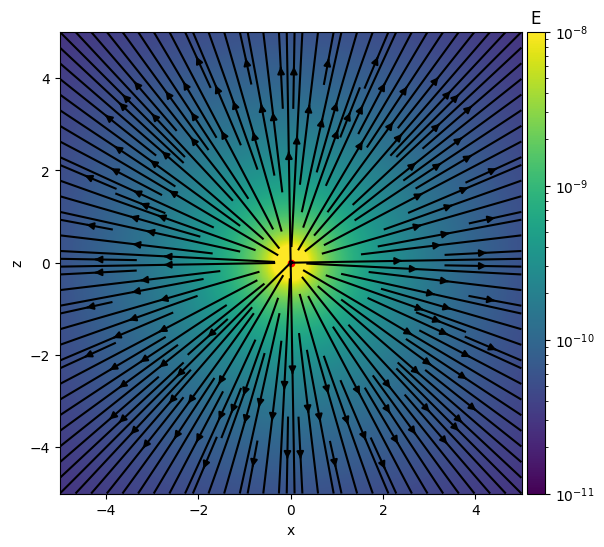

In [52]:
i=0
t=i*dt
E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
Ex = E_total[0][:, 0, :]
Ey = E_total[1][:, 0, :]
Ez = E_total[2][:, 0, :]
Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)

fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e-11
vmax=1e-8
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
# step=40
# Q = ax.quiver(x0[::step], x0[::step],
#               np.transpose(Ex[::step, ::step]/Enorm[::step,::step]), np.transpose(Ez[::step, ::step]/Enorm[::step,::step]), scale_units='xy')
pos = ax.scatter( 0.5 * acceleration * t*t, 0, s=20, c='red', marker='o')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('E')
plt.show()

In [43]:
for i in range(0,n_frame+1):
    t=i*dt
    E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total')
    Ex = E_total[0][:, 0, :]
    Ey = E_total[1][:, 0, :]
    Ez = E_total[2][:, 0, :]
    Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)
    fig=plt.figure(figsize=(7,6))
    ax=fig.add_subplot(111)
    vmin=1e-11
    vmax=1e-8
    im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
    stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
    pos = ax.scatter(0.5 * acceleration * t * t, 0, s=20, c='red', marker='o')
    ax.set_aspect('equal')
    plt.xlabel("x")
    plt.ylabel("z")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.title('E')
    plt.savefig(os.path.join(plotdir,'slice%03d.png' % (i))) # the plots are saved as ./plot/slice000.png, ./plot/slice001.png, etc
    plt.close()

In [44]:
!ffmpeg -y -f image2 -r 6 -i plot/slice%03d.png -c:v libx264 -crf 18 -pix_fmt yuv420p const_accel.mp4
!rm plot/slice*

ffmpeg version 2024-02-29-git-4a134eb14a-full_build-www.gyan.dev Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 13.2.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=pkgconf --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxvid --enable-libaom --enable-libjxl --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --en